In [1]:
import pandas as pandas
import numpy as numpy

data = pandas.read_csv("data/data.csv")

In [2]:
# Replace all '?' characters with numpy NaN 
data.replace('?', numpy.nan, inplace= True)

# Update the columns type of age and fare
# to a float64
data = data.astype({"age": numpy.float64, "fare": numpy.float64})




In [3]:


# Replace string data with numerical data
# for gender distribution 
data.replace({'male': 1, 'female': 0}, inplace=True)

# Calculate the variables that most
# strongly correlate with the survived boolean
data.corr().abs()[["survived"]]



,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


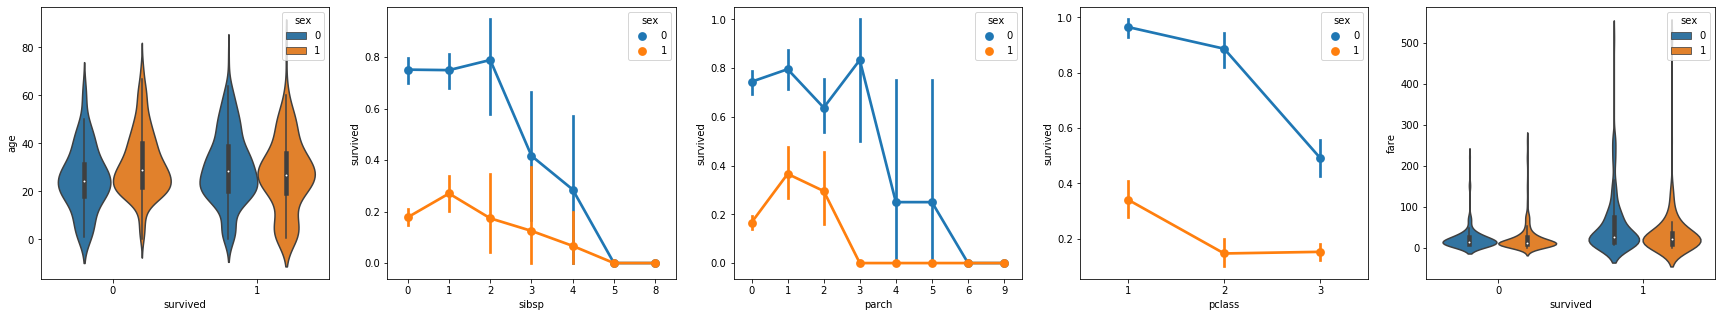

In [4]:

# Some plotting examples of the data
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [5]:

# check if for a given passenger, the number of sibsp (sibling/spouse) and parch is greater than 0 and, if so, 
# you can then say that they had a relative on board. Add these to a new column called 'relatives' 
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [6]:

# Assign a sub-set of our data as main data (we remove 'sibsp' and 'parch' ) and drop all
# numpy NaN values so that we are left with a clean dataset
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()
data.corr().abs()[["survived"]]

,survived
sex,0.537719
pclass,0.319979
age,0.053958
relatives,0.206754
fare,0.249164
survived,1.000000


In [7]:
# Dataset is now ready for machine learning, import
# required libraries
from sklearn.model_selection import train_test_split

# Create four variables and assign all data equally
# Two are of training, two are for testing (to validate accuracy)
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)




In [8]:
# Normalize all inputs so that all data
# is scaled equally
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Create the two variables with normalised data
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)



In [9]:
# There's various ML algorithms to apply, in order to help
# you choose there's a chart to help you choose here: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

# In this example, we go with the Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [10]:
# In order to test the results of the model, we can
# import metrics

from sklearn import metrics

# Create a variable that stores the test results of the 
# model.predict method using the x tests.
predict_test = model.predict(X_test)

print(metrics.accuracy_score(y_test, predict_test))

TypeError: predict_proba() missing 1 required positional argument: 'X'

In [11]:
# Could use a neural net:  https://code.visualstudio.com/docs/python/data-science-tutorial